In [3]:
from google.colab import files
uploaded = files.upload()
%ls

Saving fer2013.csv to fer2013.csv
fer2013.csv  sample_data/


# Read data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("./data/fer2013.csv")

# Define funtions to preprocess data

In [8]:
def data_prep(data):
    image_array = np.zeros(shape=(len(data), 2304))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, 2304)
        image_array[i] = image
        
    return image_array, image_label

# Get train and test data

In [9]:
train_image, train_labels = data_prep(data[data['Usage']=='Training'])
test_image, test_labels = data_prep(data[(data['Usage']=='PrivateTest') | (data['Usage'] =='PublicTest')])

# Normalize the data

In [10]:
train_images = train_image/255
test_images = test_image/255

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []
accuracies_by_hyper = []
hyperparams = range(10, 30)
for k in hyperparams:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_images[:3000], train_labels[:3000])
    predictions = knn.predict(test_images[:3000])
    accuracy_score_k = accuracy_score(test_labels[:3000], predictions)*100
    accuracies.append(accuracy_score_k)
    accuracies_by_hyper.append([k, accuracy_score_k])

In [12]:
sorted_result = sorted(accuracies_by_hyper, key=lambda tup: tup[1])
# Get lambda with highest accuracy
best_hyperparam = sorted_result[-1][0]
best_neg_log_prob = sorted_result[-1][1]
print('best k is %d' %best_hyperparam)

best k is 20


No handles with labels found to put in legend.


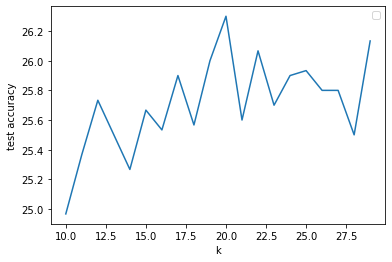

In [15]:
import matplotlib.pyplot as plt
plt.plot(hyperparams, accuracies)
plt.ylabel('test accuracy')
plt.xlabel('k')
plt.legend()